# Shock problem

In [3]:
import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 11, 5

In [4]:
class ShockTube(object):
    @staticmethod
    def shock_tube_function(p4, p1, p5, rho1, rho5, gamma):
        z = (p4 / p5 - 1.)
        c1 = np.sqrt(gamma * p1 / rho1)
        c5 = np.sqrt(gamma * p5 / rho5)
        gm1 = gamma - 1.
        gp1 = gamma + 1.
        g2 = 2. * gamma
        fact = gm1 / g2 * (c5 / c1) * z / np.sqrt(1. + gp1 / g2 * z)
        fact = (1. - fact) ** (g2 / gm1)
        return p1 * fact - p4

    def __init__(self, p_1, p_5, rho_1, rho_5, gamma=1.4):
        self.gamma = gamma
        self.p_1 = p_1
        self.p_5 = p_5
        self.rho_1 = rho_1
        self.rho_5 = rho_5
        self.u_1 = 0
        self.u_5 = 0
        self.p_4 = scipy.optimize.fsolve(self.shock_tube_function, self.p_1, 
                   (self.p_1, self.p_5, self.rho_1, self.rho_5, self.gamma))[0]
        z = (self.p_4 / self.p_5 - 1.)
        c5 = np.sqrt(gamma * self.p_5 / self.rho_5)

        gm1 = self.gamma - 1.
        gp1 = self.gamma + 1.
        gmfac1 = 0.5 * gm1 / self.gamma
        gmfac2 = 0.5 * gp1 / self.gamma
        fact = np.sqrt(1. + gmfac2 * z)
        self.u_4 = c5 * z / (self.gamma * fact)
        self.rho_4 = self.rho_5 * (1. + gmfac2 * z) / (1. + gmfac1 * z)

        # shock speed
        self.w = c5 * fact
        
        self.p_3 = self.p_4
        self.u_3 = self.u_4
        self.rho_3 = self.rho_1 * (self.p_3 / self.p_1)**(1. / self.gamma)
    
    def get_positions(self, t):
        c1 = np.sqrt(self.gamma * self.p_1 / self.rho_1)
        c3 = np.sqrt(self.gamma * self.p_3 / self.rho_3)
        return np.array([- c1 * t, (self.u_3 - c3) * t, self.u_3 * t, self.w * t ,])
    
    def get_points(self, t, num_points=10):
        jump = 10e-10
        c1 = np.sqrt(self.gamma * self.p_1 / self.rho_1)
        c5 = np.sqrt(self.gamma * self.p_5 / self.rho_5)
        gm1 = self.gamma - 1.
        gp1 = self.gamma + 1.
        pos = self.get_positions(t)
        x_pos_1_2 = np.linspace(pos[0], pos[1], num_points)
        x_min = pos[0] - (pos[-1] - pos[0]) * 0.4
        x_max = pos[-1] + (pos[-1] - pos[0]) * 0.4

        u_1_2 = 2. / gp1 * (c1 + x_pos_1_2 / t)
        fact = 1. - 0.5 * gm1 * u_1_2 / c1
        rho_1_2 = self.rho_1 * fact ** (2. / gm1)
        p_1_2 = self.p_1 * fact ** (2. * self.gamma / gm1)

        x_values = np.array([x_min] + list(x_pos_1_2) + 
                            [pos[2], pos[2] + jump, pos[3], pos[3] + jump, x_max])
        p_values = np.array([self.p_1] + list(p_1_2) +
                            [self.p_3, self.p_4, self.p_4, self.p_5, self.p_5])
        u_values = np.array([self.u_1] + list(u_1_2) +
                            [self.u_3, self.u_4, self.u_4, self.u_5, self.u_5])
        rho_values = np.array([self.rho_1] + list(rho_1_2) +
                            [self.rho_3, self.rho_4, self.rho_4, 
                             self.rho_5, self.rho_5])
        return x_values, p_values, rho_values, u_values, x_min, x_max

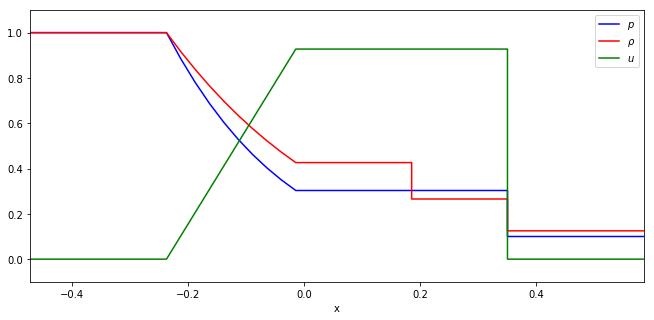

In [7]:
tube = ShockTube(1., 0.1, 1., 0.125)
x, p, rho, u, x_min, x_max = tube.get_points(0.2)
plt.plot(x, p, linewidth=1.5, color='b', label=r'$p$')
plt.plot(x, rho, linewidth=1.5, color='r', label=r'$\rho$')
plt.plot(x, u, linewidth=1.5, color='g', label=r'$u$')
plt.xlabel('x')
plt.legend()
plt.axis([x_min, x_max, -0.1, 1.1])
plt.show()